In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('sonardataset.csv')

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
#Lets check null values if any
sns.heatmap(data.isnull())

In [ ]:
#Lets check the correlation
sns.heatmap(data.corr(),annot=True)

In [ ]:
#As we can see the above data and found that their are too many correlated attributes, so lets split the input varibale and decompose it with PCA
x=data.iloc[:,:-1]
x.head()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
ss=StandardScaler()
x=ss.fit_transform(x)
pca=PCA(8)
x=pca.fit_transform(x)
x=pd.DataFrame(data=x)

In [ ]:
#lets take output variable and convert it into Binary Classification through level encoder
y=data.iloc[:,-1]
y.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
y=LE.fit_transform(y)
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=239,stratify=y)

In [ ]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,roc_curve,auc

In [ ]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [ ]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

*********************** KNeighborsClassifier ***********************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_score =  0.8571428571428571


roc_auc_score =  0.85


classification_report
               precision    recall  f1-score   support

           0       0.79      1.00      0.88        22
           1       1.00      0.70      0.82        20

    accuracy                           0.86        42
   macro avg       0.89      0.85      0.85        42
weighted avg       0.89      0.86      0.85        42



[[22  0]
 [ 6 14]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



*********************** SVC ***********************


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shri

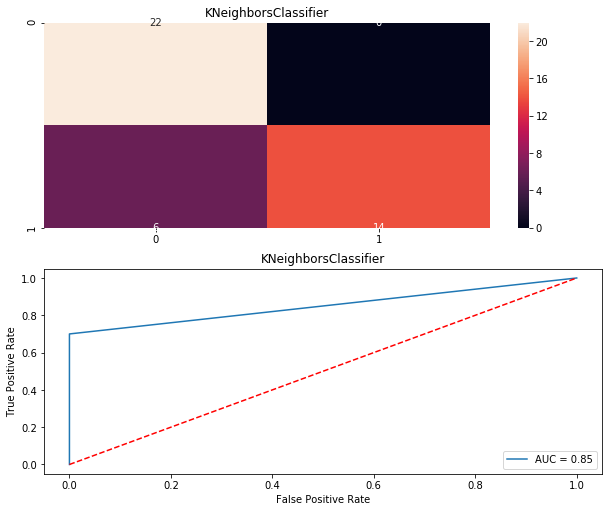

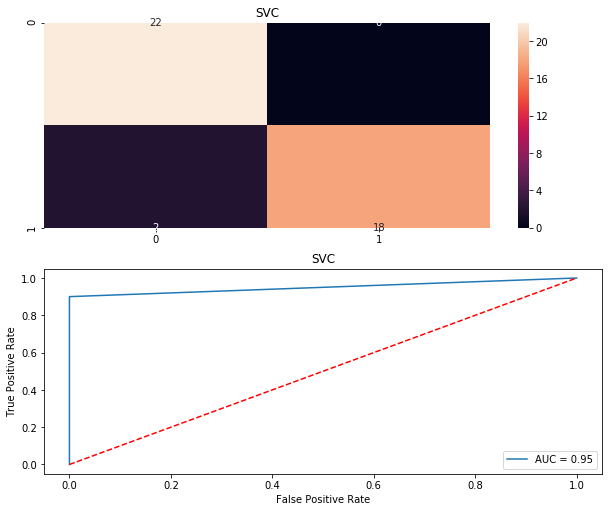

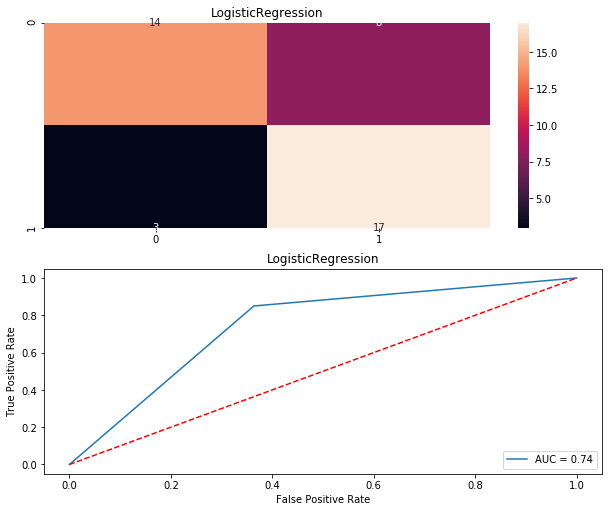

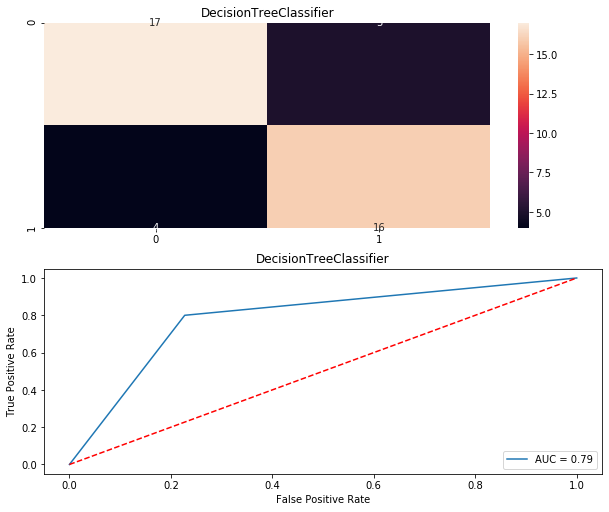

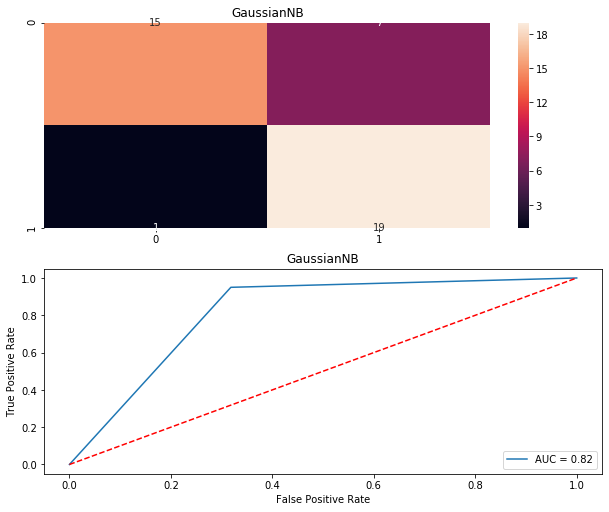

In [34]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('***********************',name,'***********************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

In [35]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score ,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_score,Roc_auc_curve
0,KNeighborsClassifier,85.714286,85.000000
1,SVC,95.238095,95.000000
2,LogisticRegression,73.809524,74.318182
3,DecisionTreeClassifier,78.571429,78.636364
4,GaussianNB,80.952381,81.590909


In [36]:
# I choose SVC Model as Accuracy Score and ROC & AUC Curve Socre is higher

In [37]:
from sklearn.externals import joblib


In [38]:
joblib.dump(SVC,"sonardataset.csv")

['sonardataset.csv']

In [39]:

model=joblib.load('sonardataset.csv')